<a href="https://colab.research.google.com/github/philo-shoby/Deep-Learning-based-Hand-Gesture-Recognition/blob/master/set2_model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip '/content/drive/My Drive/asl-dataset.zip'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!rm -rf '/content/asl_dataset/asl_dataset'

In [0]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization

In [0]:
labels_dict = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'a':10,'b':11,'c':12,
                   'd':13,'e':14,'f':15,'g':16,'h':17,'i':18,'j':19,'k':20,'l':21,'m':22,'n':23,'o':24,
                   'p':25,'q':26,'r':27,'s':28, 't':29, 'u':30, 'v':31, 'w':32, 'x':33, 'y':34, 'z':35}
img = []
labels = []
imgdir = '/content/asl_dataset'
for folder in os.listdir(imgdir) :
  for file in os.listdir(imgdir+'/'+folder):
    filepath = imgdir + '/' + folder + '/' + file
    image = cv2.imread(filepath)
    image = cv2.resize(image, (64,64))
    img.append(image)
    labels.append(labels_dict[folder])

In [0]:
img = np.array(img)
img = img.astype('float32')/255.0
img[0][0][0]

array([0., 0., 0.], dtype=float32)

In [0]:
print(labels)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2

In [0]:
labels = to_categorical(labels)
labels.shape

(2515, 36)

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(img,labels,test_size = 0.05)
xtrain.shape

(2389, 64, 64, 3)

In [0]:
model=Sequential()
model.add(Conv2D(50,kernel_size=(3,3),input_shape=(64,64,3),strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(36,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 50)        1400      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 75)        33825     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 75)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 125)       84500     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 125)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 125)      

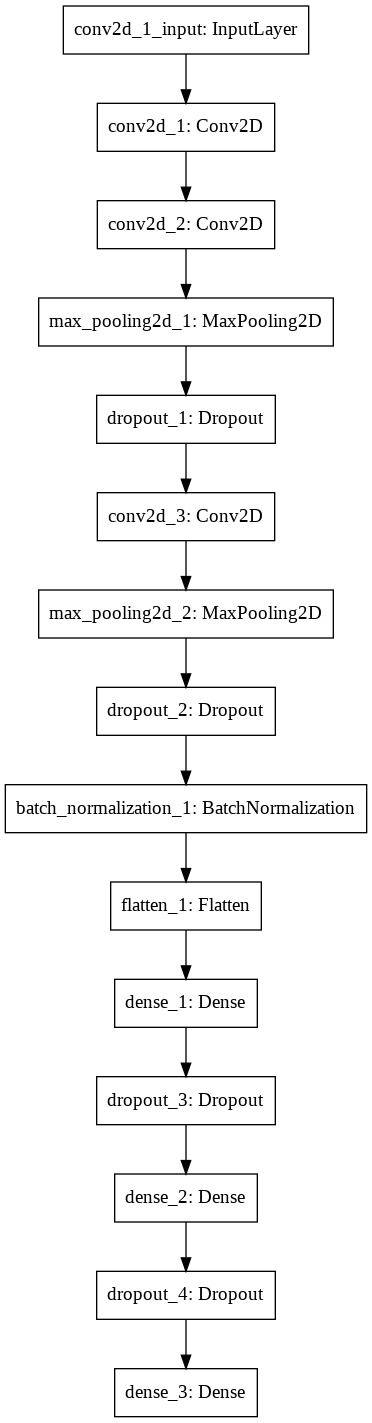

In [0]:

from keras.utils import plot_model
plot_model (model, to_file = "Model.png")

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

top_layers = "top_layers.hdf5"

checkpoint = ModelCheckpoint(top_layers, monitor='loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor="loss", mode="min", patience=5)


In [0]:
history = model.fit(xtrain,ytrain,batch_size=128,epochs=50,validation_data=(xtest,ytest),callbacks=[checkpoint, early])

Train on 2389 samples, validate on 126 samples
Epoch 1/50
2389/2389 [==============================] - 46s 19ms/step - loss: 2.8733 - accuracy: 0.3018 - val_loss: 3.2370 - val_accuracy: 0.1825

Epoch 00001: loss improved from inf to 2.87326, saving model to top_layers.hdf5
Epoch 2/50
2389/2389 [==============================] - 44s 19ms/step - loss: 1.0637 - accuracy: 0.6756 - val_loss: 2.9637 - val_accuracy: 0.2381

Epoch 00002: loss improved from 2.87326 to 1.06375, saving model to top_layers.hdf5
Epoch 3/50
2389/2389 [==============================] - 44s 19ms/step - loss: 0.5612 - accuracy: 0.8192 - val_loss: 2.6914 - val_accuracy: 0.4127

Epoch 00003: loss improved from 1.06375 to 0.56120, saving model to top_layers.hdf5
Epoch 4/50
2389/2389 [==============================] - 44s 19ms/step - loss: 0.3706 - accuracy: 0.8732 - val_loss: 2.5116 - val_accuracy: 0.5317

Epoch 00004: loss improved from 0.56120 to 0.37064, saving model to top_layers.hdf5
Epoch 5/50
2389/2389 [===========

In [0]:
model.save('/content/drive/My Drive/set_model')

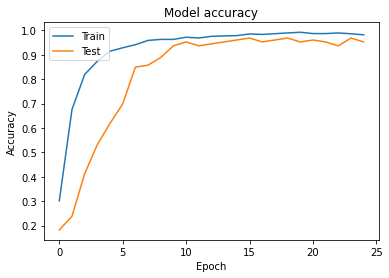

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

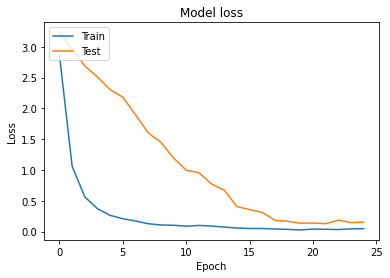

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()